<a href="https://colab.research.google.com/github/karvs1458-gif/Inteligencia-Artificial/blob/main/Multicapa/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #importamos la libreria numpy y le ponemos un sobre nombre (np) para hacerlo mas corto

#crea una matriz con las entradas (inputs) del problema lógico XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]]) #entradas
y = np.array([[0],[1],[1],[0]]) #salidas

In [2]:
#definir el modelo de red neuronal
from tensorflow.keras.models import Sequential #importamos desde tensorflow a Sequential que es el modelo que ocupamos
from tensorflow.keras.layers import Dense #importa la clase Dense, que representa una capa totalmente conectada

#definimos la arquitectura de la red neuronal.
modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from tensorflow.keras.optimizers import Adam

#determinamos la tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)  #importamos "Adam" (uno de los optimizadores más usados porque “aprende a aprender”)

In [4]:
#el método .compile() configura el modelo antes de entrenarlo
#esta celda sirve para preparar y configurar la red neuronal antes de entrenarla
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
#despues de configurar la red ahora si la entrenamos
history = modelo.fit(
    X, y,
    epochs=100, #definimos entrenar con 100 epocas
    verbose=1,
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7500 - loss: 0.6931
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 0.6931
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - lo

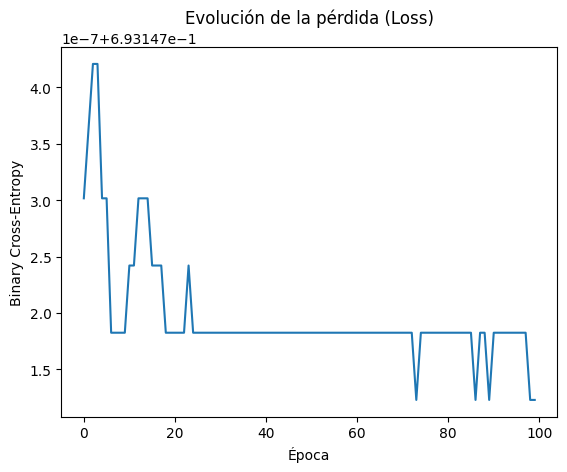

In [10]:
#importamos el modulo matplotlib.pyplot para graficar nuestra evolución de perdida
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

In [ ]:
#esta celda es para que nos diga la perdida y la exactitud del modelo
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7500 - loss: 0.3535
Loss: 0.3535038232803345, Accuracy: 0.75


In [ ]:
#Y por ultimo hacemos las predicciones y comparamos las predicciones con los valores reales
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")
#toma el modelo entrenado, predice los resultados para las entradas y muestra en pantalla qué salida da el modelo para cada combinación de entrada.
#es donde verificamos si el modelo aprendió correctamente

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0 0] -> 0
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0
